In [1]:
from scipy.io import mmread
from scipy import sparse
import numpy as np
import pandas as pd

In [2]:
import numpy as np
from scipy import sparse

def sparse_corrcoef(A, B=None):

    if B is not None:
        A = sparse.vstack((A, B), format='csr')

    A = A.astype(np.float64)
    n = A.shape[1]

    # Compute the covariance matrix
    rowsum = A.sum(1)
    centering = rowsum.dot(rowsum.T.conjugate()) / n
    C = (A.dot(A.T.conjugate()) - centering) / (n - 1)

    # The correlation coefficients are given by
    # C_{i,j} / sqrt(C_{i} * C_{j})
    d = np.diag(C)
    coeffs = C / np.sqrt(np.outer(d, d))

    return coeffs


In [3]:
def k_nearest_Graph(A,k):
    A=A.tocsr()
    graph=[]
    for i,row in zip(range(A.shape[0]),A):
        adjacency=list(np.zeros(A.shape[0]))
        
        distance=[]
        for point in A:
            diff=row-point
            diff=diff.todense()
            diff=np.square(diff)
            distance.append(np.sum(diff)**(1/2))
        distance=sorted(distance)
        for val in distance[:k+1]:
            index=distance.index(val)
            adjacency[index]=1
        graph.append(adjacency)
    graph=graph-np.eye(A.shape[0])
    return sparse.csr_matrix(graph)

In [9]:
#Give the mtx path below and scale the features
b=mmread('C:/Users/Madhur/Documents/IITD/ELL-888/Project/data/SingleCell_gene_/uRA1/uRA1_expression_matrix (1).mtx')


array([    9,    28,    31, ..., 13979, 13980, 13981])

In [10]:
#build the graph
graph2=k_nearest_Graph(b,6)

In [11]:
#if you don't have labeled data then save it with this
np.savez("uRA1.npz",feature_indices=b.indices,feature_data=b.data,feature_indptr=b.indptr,feature_shape=b.shape,adj_indices=graph2.indices,adj_data=graph2.data,adj_indptr=graph2.indptr,adj_shape=graph2.shape)

In [47]:
#in case you have matrix that requires the transpose to be taken.
a = mmread('C:/Users/Madhur/Documents/IITD/ELL-888/Project/data/SingleCell_gene_/GRCh38/matrix.mtx')
a=a.T
graph=k_nearest_Graph(a,6)
a=a.tocsr()
np.savez("singlecell.npz",feature_indices=a.indices,feature_data=a.data,feature_indptr=a.indptr,feature_shape=a.shape,adj_indices=graph.indices,adj_data=graph.data,adj_indptr=graph.indptr,adj_shape=graph.shape)

In [12]:
#if you have the label data check if it starts with 0 or 1 
print(set(pd.read_csv("K means clusters.csv")['Cluster'].to_numpy()))

{1, 2, 3, 4, 5, 6, 7, 8}


In [61]:
#if you have label data then please save it with this
labels=sparse.csr_matrix((pd.read_csv("K means clusters.csv")['Cluster'].to_numpy()))
np.savez("singlecell_labelled.npz",feature_indices=b.indices,feature_data=b.data,feature_indptr=b.indptr,feature_shape=b.shape,adj_indices=graph2.indices,adj_data=graph2.data,adj_indptr=graph2.indptr,adj_shape=graph2.shape,labels=labels.data,label_indices=labels.indices)

In [13]:
print(graph2)

  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 4)	1.0
  (0, 5)	1.0
  (0, 6)	1.0
  (1, 0)	1.0
  (1, 2)	1.0
  (1, 3)	1.0
  (1, 4)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (2, 0)	1.0
  (2, 1)	1.0
  (2, 3)	1.0
  (2, 4)	1.0
  (2, 5)	1.0
  (2, 6)	1.0
  (3, 0)	1.0
  (3, 1)	1.0
  (3, 2)	1.0
  (3, 4)	1.0
  (3, 5)	1.0
  (3, 6)	1.0
  (4, 0)	1.0
  :	:
  (13984, 13984)	-1.0
  (13985, 0)	1.0
  (13985, 1)	1.0
  (13985, 2)	1.0
  (13985, 3)	1.0
  (13985, 4)	1.0
  (13985, 5)	1.0
  (13985, 6)	1.0
  (13985, 13985)	-1.0
  (13986, 0)	1.0
  (13986, 1)	1.0
  (13986, 2)	1.0
  (13986, 3)	1.0
  (13986, 4)	1.0
  (13986, 5)	1.0
  (13986, 6)	1.0
  (13986, 13986)	-1.0
  (13987, 0)	1.0
  (13987, 1)	1.0
  (13987, 2)	1.0
  (13987, 3)	1.0
  (13987, 4)	1.0
  (13987, 5)	1.0
  (13987, 6)	1.0
  (13987, 13987)	-1.0


In [104]:
# First networkx library is imported 
# along with matplotlib 
import networkx as nx 
import matplotlib.pyplot as plt 


# Defining a Class 
class GraphVisualization: 

	def __init__(self): 
		
		# visual is a list which stores all 
		# the set of edges that constitutes a 
		# graph 
		self.visual = [] 
		self.colors="green"
		
	# addEdge function inputs the vertices of an 
	# edge and appends it to the visual list 
	def addEdge(self, a, b): 
		temp = [a, b] 
		self.visual.append(temp) 
	def add_NodeColors(self,colors):
		self.colors=colors
	# In visualize function G is an object of 
	# class Graph given by networkx G.add_edges_from(visual) 
	# creates a graph with a given list 
	# nx.draw_networkx(G) - plots the graph 
	# plt.show() - displays the graph 
	def visualize(self): 
		G = nx.Graph() 
		G.add_edges_from(self.visual) 
		pos=nx.spring_layout(G)
		nx.draw_networkx(G,with_labels=False,node_size=12,pos=pos,node_color=self.colors) 
		plt.show() 

# Driver code 
 


In [90]:
true_clusters=(pd.read_csv("K means clusters.csv")['Cluster'].to_numpy()-np.ones(pd.read_csv("K means clusters.csv")['Cluster'].to_numpy().shape,dtype=np.int32))
pred_clusters=pd.read_csv("clusters.csv").to_numpy().reshape(1,-1)[0]
colordict={'0':'red','1':'green','2':'blue','3':'purple','4':'orange','5':'indigo','6':'brown','7':'magenta'}
print(true_clusters)
colors=[colordict[str(i)] for i in true_clusters]

[1 1 1 ... 2 3 1]


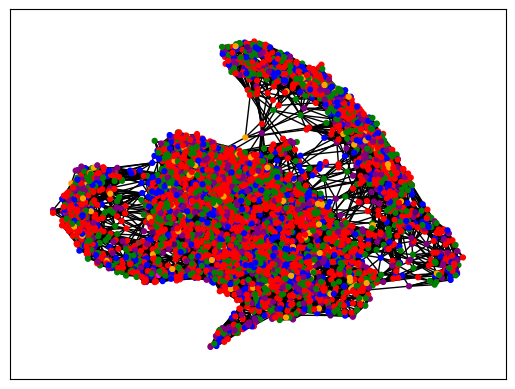

In [91]:
G = GraphVisualization() 
indices=graph.indices
indptr=graph.indptr
indices=graph.indices
indptr=graph.indptr
for i in range(len(indptr)-1):
    index=indices[indptr[i]:indptr[i+1]]
    for ind in index:
        G.addEdge(i,ind)
G.add_NodeColors(colors)
G.visualize()

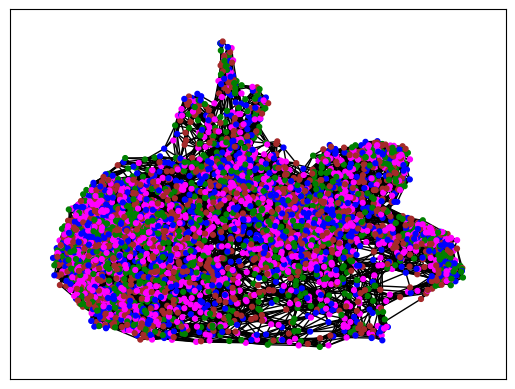

In [92]:
colors=[colordict[str(i)] for i in pred_clusters]

G.add_NodeColors(
    colors=colors
)
G.visualize()

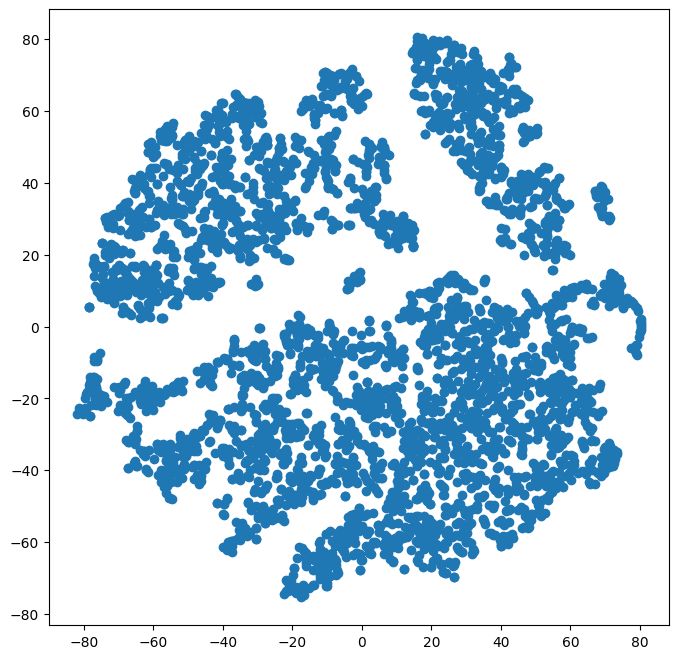

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import networkx as nx
from sklearn.decomposition import TruncatedSVD

tsne = TSNE(n_components=2, perplexity=10, random_state=42)
t_svd=TruncatedSVD()
#X_embedded = t_svd.fit_transform(a)
X_embedded = tsne.fit_transform(np.array(a.todense()))


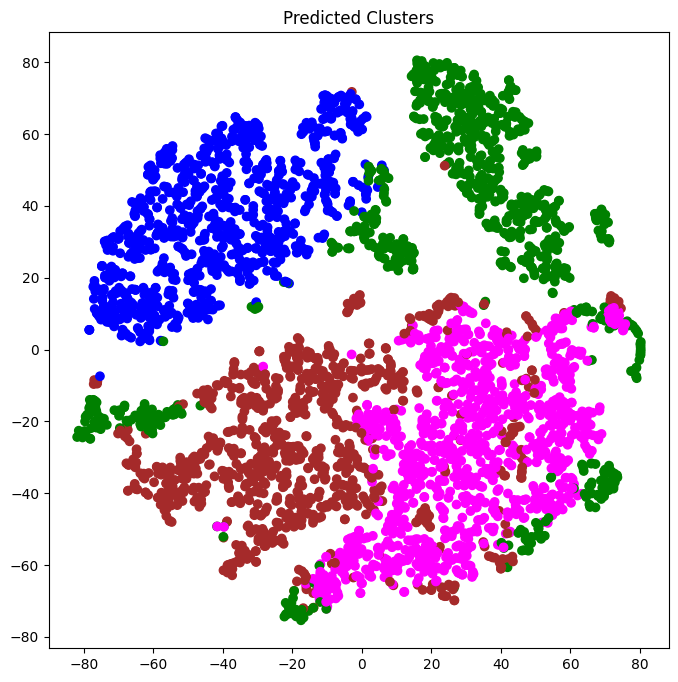

In [115]:
colors=[colordict[str(i)] for i in pred_clusters]
plt.figure(figsize=(8, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=colors)
plt.title('Predicted Clusters')
plt.savefig("../Results/predicted_cluster_tsne_pbmc.png")

In [111]:
colordict={'0':'red','1':'green','2':'blue','3':'purple','4':'orange','5':'indigo','6':'brown','7':'magenta'}
true_col_dict={'7':'red','3':'green','1':'blue','6':'purple','4':'orange','5':'indigo','2':'brown','0':'magenta'}

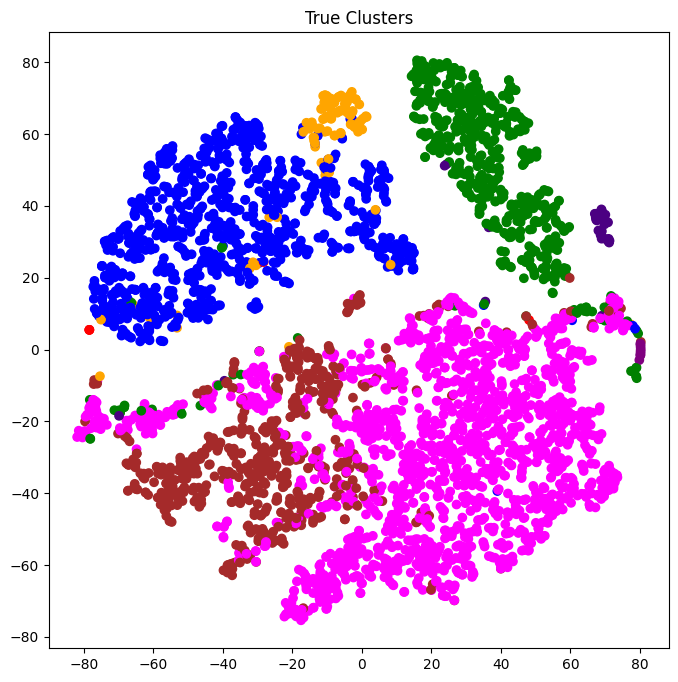

In [114]:
colors=[true_col_dict[str(i)] for i in true_clusters]
plt.figure(figsize=(8, 8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1],c=colors)
plt.title("True Clusters")
plt.savefig("../Results/true_cluster_tsne.png")

In [7]:
newgr=np.asarray(graph)

In [8]:
inv_corr=np.linalg.inv(newgr)

In [10]:
inv_corr

array([[ 1.00000000e+00,  6.96553926e-12,  7.04281078e-12, ...,
         5.70749004e-12,  5.44914808e-12,  6.77546907e-12],
       [-2.53663757e-12,  1.00000000e+00, -2.35722553e-12, ...,
        -1.01252340e-12, -7.08766379e-13, -2.11208828e-12],
       [-3.12638804e-12, -3.38928885e-12,  1.00000000e+00, ...,
        -3.53850282e-12, -3.21165317e-12, -3.56692453e-12],
       ...,
       [ 4.54747351e-13,  6.82121026e-13,  7.95807864e-13, ...,
         1.00000000e+00,  6.82121026e-13,  4.54747351e-13],
       [-2.27373675e-13, -1.70530257e-13, -1.56319402e-13, ...,
        -2.84217094e-13,  1.00000000e+00, -1.98951966e-13],
       [ 4.26325641e-13,  3.69482223e-13,  2.98427949e-13, ...,
         4.40536496e-13,  4.12114787e-13,  1.00000000e+00]])